In [20]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Recap,BRICS
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit import RDLogger
import random

In [70]:
## https://gist.github.com/greglandrum/4076605

In [2]:
sdf1 = Chem.SDMolSupplier('M04.sdf', removeHs=False)
sdf2 = Chem.SDMolSupplier('M12.sdf', removeHs=False)

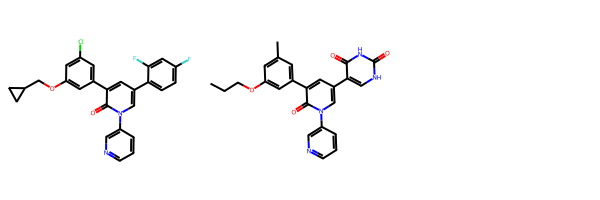

In [9]:
sdfs = [sdf1, sdf2]
molecules = []
molecules.clear()
for m in sdfs:
    smi = Chem.MolToSmiles(m[0])
    mol = Chem.MolFromSmiles(smi)
    molecules.append(mol)

Draw.MolsToGridImage(molecules)


In [54]:
## 2. ------------------------------------------
# generate dummy atom
du = Chem.MolFromSmiles('*')

all_smiles = []
all_smiles.clear()

mols = []

##************************
## suppress rdkit warnings
RDLogger.DisableLog('rdApp.*')
##************************

## fragmenting using BRICSDecompose
for mol in molecules:
    frags = list(Chem.BRICS.BRICSDecompose(mol, minFragmentSize=1, keepNonLeafNodes=True, returnMols=False))
    ##if returnMols = False
    mols = [Chem.MolFromSmiles(x) for x in frags]
    ## replace dummy atoms with hydrogens
    molh = [AllChem.ReplaceSubstructs(x,du,Chem.MolFromSmiles('[H]'), True)[0] for x in mols]
    mols.append(molh[0])
    ## convert mols to smiles
    all_smiles.append([Chem.MolToSmiles(x) for x in molh])
    
##***************************
## enable default rdkit warnings again
RDLogger.EnableLog('rdApp.info')
##****************************

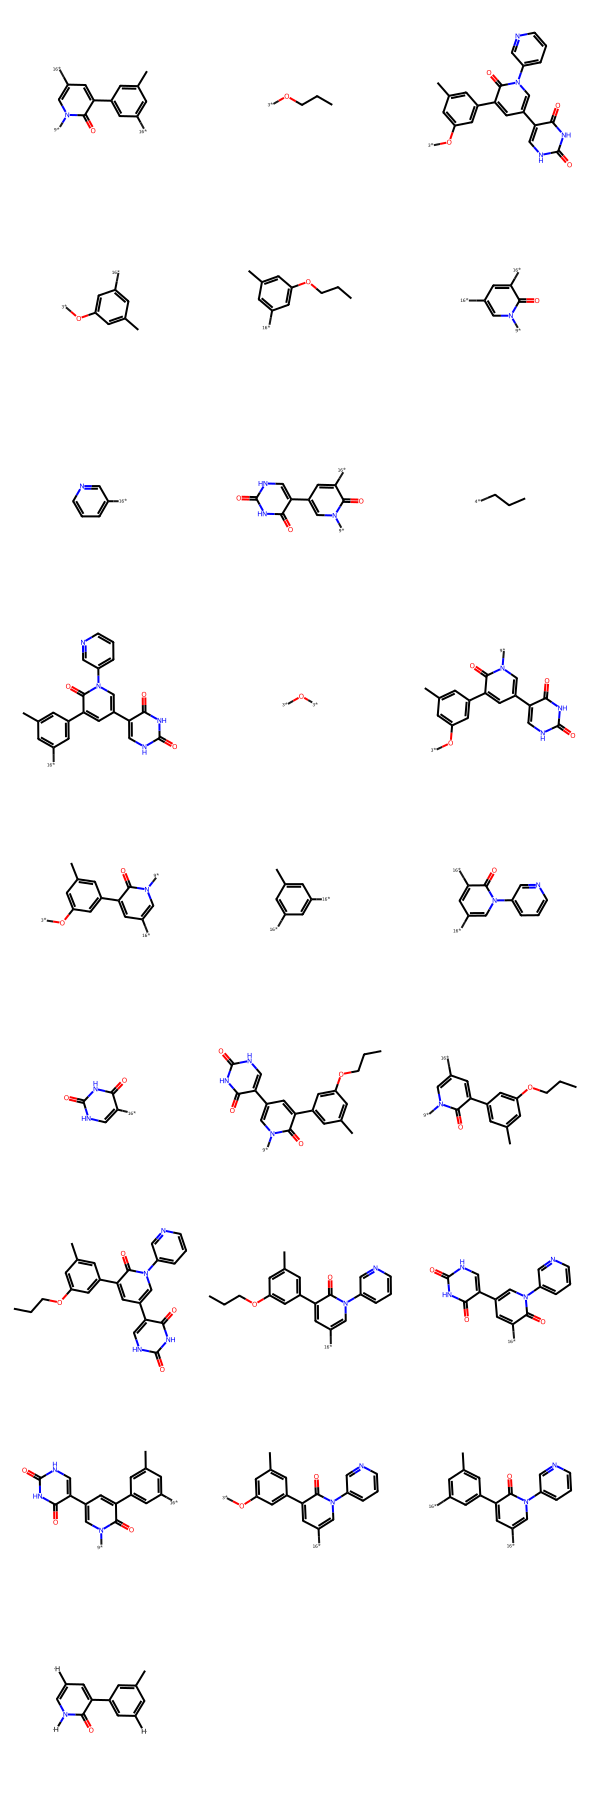

In [55]:
#display(all_smiles)
Draw.MolsToGridImage(mols)

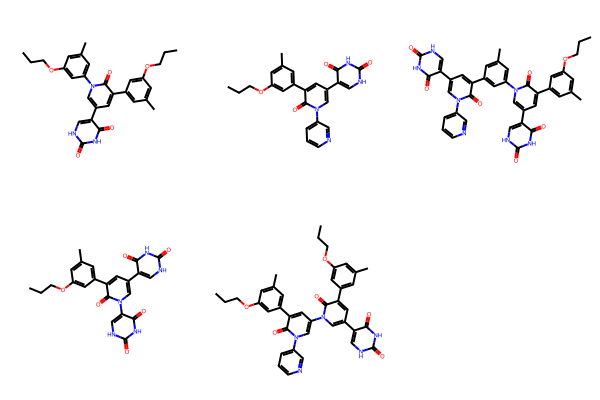

In [50]:
build = BRICS.BRICSBuild(mols)
random.seed(90)

prods = [next(build) for x in range(5)]
Draw.MolsToGridImage(prods)

In [57]:
junk = []

for mol in range(len(molecules)):
    fragmented = BRICS.BreakBRICSBonds(molecules[mol])
    pieces = Chem.GetMolFrags(fragmented, asMols=True)
    junk.append(pieces)


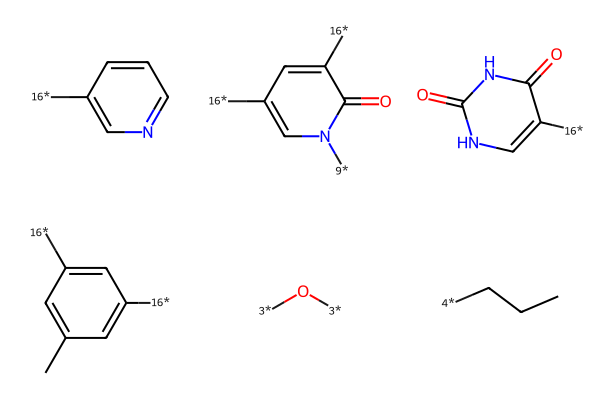

In [64]:
Draw.MolsToGridImage(junk[0])
Draw.MolsToGridImage(junk[1])

In [65]:
import random
random.seed(127)

fragms = []
for m in junk:
    for f in range((len(m))):
        fragms.append(m[f])
        
ms = BRICS.BRICSBuild(fragms)

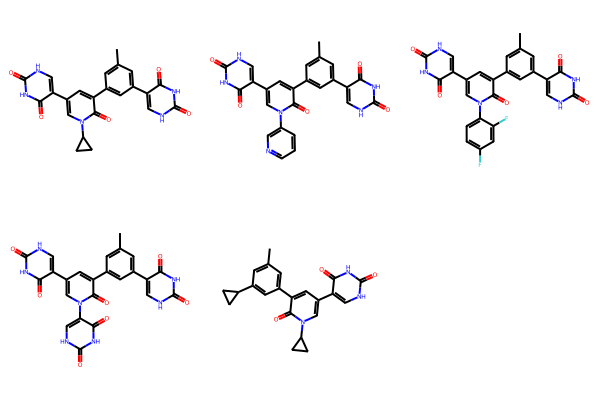

In [69]:
prods = [next(ms) for x in range(5)]
Draw.MolsToGridImage(prods)